<hr/>

# Foundations of Reinforcement Learning

<hr/>

<h1><font color="darkblue">Lab 2: Multi-armed Bandit </font></h1>



<img src="multiarmedbandit.jpg" width="300" height="300" align="left"/>


<br><br><br><br><br><br><br><br><br><br><br><br>


[image source](https://www.microsoft.com/en-us/research/?from=http%3A%2F%2Fresearch.microsoft.com%2Fen-us%2Fprojects%2Fbandits%2F)



##  Content
1. Problem statement
0. Greedy and $\epsilon$-greedy Algorithm
0. UCB Action Selection Algorithm


In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Problem Statement [P 21, Ch 2.3, Sutton]

#### Define a 10-armed bandit problem in which the action values $q_*(a)$, $a = 1,...,10$, are samples from a standard norm distribution, i.e. Gaussian distribution with mean $= 0$ and variance $ = 1$. Then, when selected $A_t$ at time step $t$, the actual reward, $R_t$ is selected from a Gaussian distribution with mean = $q_*(A_t)$ and variance = 1.

In [2]:
def initialize_true_action_values(arm_num):
    return np.random.normal(0, 1, arm_num)

# Define a function to simulate a bandit problem
def bandit(action, true_action_values):
    return np.random.normal(true_action_values[action], 1)# 


## Problem 1.  Greedy and $\epsilon$-greedy algorithm

1. Implement a function/functions that run this game 2000 times with $\epsilon$-greedy algorithm. Your function/functions should take $\epsilon$ as one of the inputs and output: (7 pts)
<br>   (a) average reward at each time step
<br>   (b) percentage of optimal action at each time step. (optimal action is defined by $a^* = arg\underset{a}max           \, q^*(a)$ )
2. Call your function/functions to generate the average reward and percentage of optimal action at each time step with: (1 pts)
<br>   (a) Greedy-algorithm 
<br>   (b) $\epsilon$-greedy algorithm, $\epsilon=0.01$ 
<br>   (c) $\epsilon$-greedy algorithm, $\epsilon=0.1$. 
3. Plot the average reward and percentage of optimal action of those three cases and compare with [P 23 Fig 2.2 Sutton]. (2 pts)

### 1.

In [3]:
import numpy as np
import matplotlib.pyplot as plt



# Define the eps-greedy algorithm
def eps_greedy( arm_num, epsilon, num_steps,true_action_values):
   
    q_estimates = np.zeros( arm_num)
    action_counts = np.zeros( arm_num)
    rewards = []
    optimal_actions = []

    for step in range(num_steps):
        # Exploration vs. exploitation
        if np.random.rand() < epsilon:
            action = np.random.choice(arm_num)
        else:
            action = np.argmax(q_estimates)

        reward = bandit(action, true_action_values)
        action_counts[action] += 1
        q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]

        # Record data for analysis
        rewards.append(reward)
        optimal_action = np.argmax(true_action_values)
        optimal_actions.append(action == optimal_action)

    return rewards, optimal_actions

# Define a function to run multiple arm banditand average the results
def multi_armed(arm_num, time_step_num, game_num, epsilon):
    #implement epsilon-greedy algorithm
    # return: 
    ## ave_reward: 
    ##    size: (time_step_num, )
    ##    value: average reward over 2000 runs at each time step
    ## ave_opt_action: 
    ##    size: (time_step_num, )
    ##    value: (0-100) percentage of optimal action taken over 2000 runs at each time step
    # Define the true action values (for a k-armed bandit problem)
    
    
    avg_reward = np.zeros(time_step_num)
    ave_opt_action= np.zeros(time_step_num)
   
    for _ in range(game_num):
        true_action_values =initialize_true_action_values(arm_num)
        rewards, optimal_actions = eps_greedy(arm_num, epsilon, time_step_num,true_action_values)
        avg_reward += np.array(rewards)
        ave_opt_action += np.array(optimal_actions, dtype=float)

    avg_reward /= game_num
    ave_opt_action /= game_num * 0.01   
    
    return avg_reward, ave_opt_action




### 2.

In [4]:
# Run the experiments
arm_num=10
game_num = 1000
time_step_num = 2000
epsilons = [0.0, 0.01, 0.1]

results = {}

for epsilon in epsilons:
   
    avg_rewards, ave_opt_actions = multi_armed(arm_num, time_step_num, game_num, epsilon)
    results[epsilon] = {"avg_rewards": avg_rewards, "optimal_actions_pct":ave_opt_actions}



### 3.

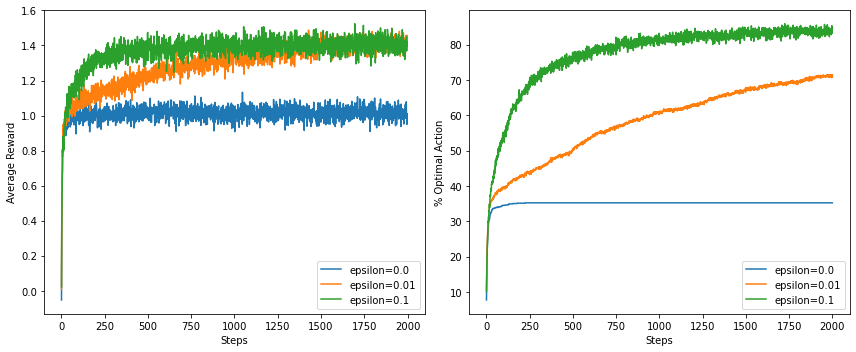

In [5]:

# Plot the results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for epsilon, data in results.items():
    plt.plot(data["avg_rewards"], label=f"epsilon={epsilon}")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()

plt.subplot(1, 2, 2)
for epsilon, data in results.items():
    plt.plot(data["optimal_actions_pct"], label=f"epsilon={epsilon}")
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.legend()

plt.tight_layout()
plt.show()


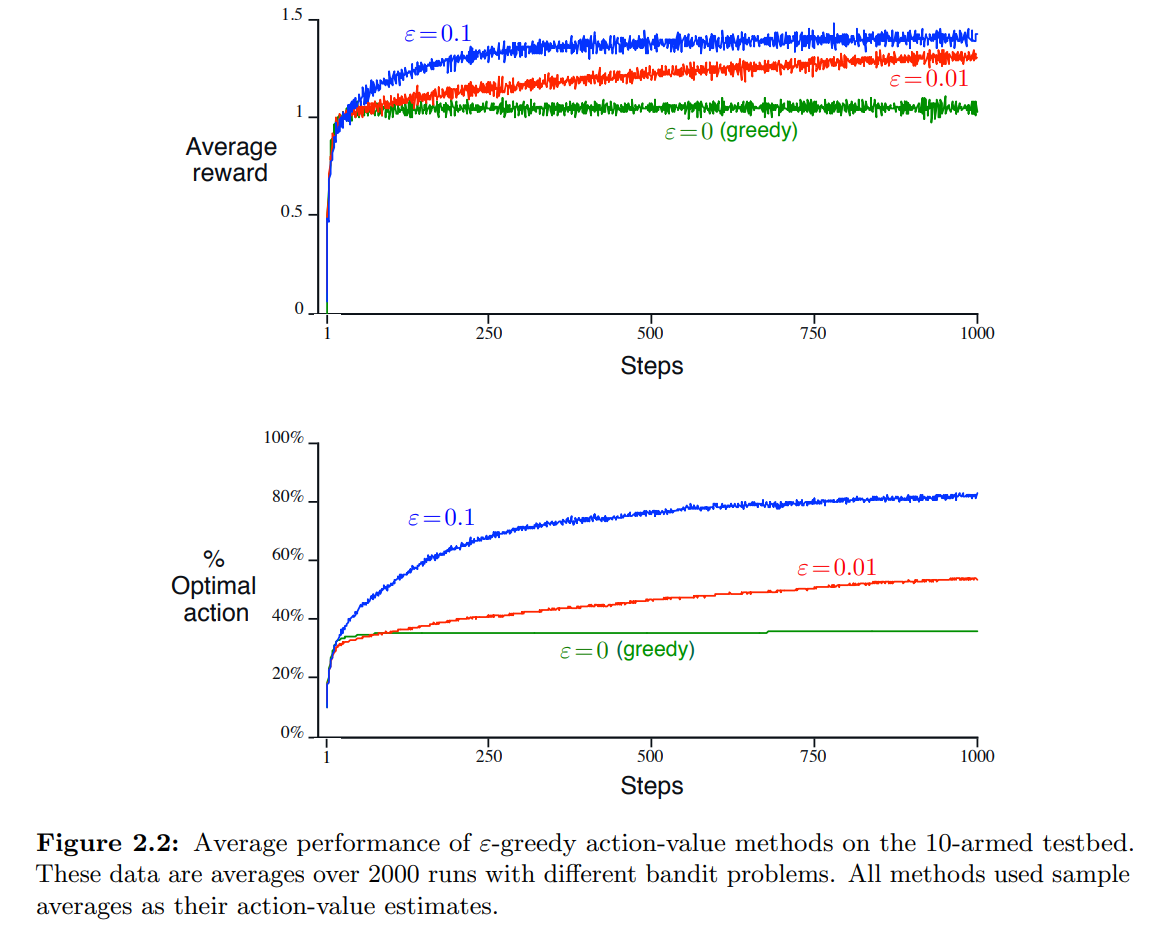

## Problem 2.  UCB Action Selection

1. Implement a function/functions that run this game 2000 times with UCB Action Selection algorithm. Your function/functions should take $c$ as one of the inputs and output: (7 pts)
<br>   - average reward at each time step.
2. Call your function/functions to generate the average reward at each time step with: (1 pts)
<br>   - UCB Action Selection algorithm, $c = 2$.
3. Plot the average reward of 2.2 and 1.2c, then compare with [P 28 Fig 2.4 Sutton]. (2 pts)

### 1.

In [6]:
import numpy as np

import numpy as np

# Define a function to run multi-armed bandit with UCB
def multi_armed_UCB(arm_num, time_step_num, game_num, c):
   
    def ucb(num_actions, c, num_steps, true_action_values):
        q_estimates = np.zeros(num_actions)
        action_counts = np.zeros(num_actions)
        rewards = []
        optimal_actions = []

        for step in range(num_steps):
            ucb_values = q_estimates + c * np.sqrt(np.log(step + 1) / (action_counts + 1e-5))
            action = np.argmax(ucb_values)

            reward = np.random.normal(true_action_values[action], 1)
            action_counts[action] += 1
            q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]

            # Record data for analysis
            rewards.append(reward)
            optimal_action = np.argmax(true_action_values)
            optimal_actions.append(action == optimal_action)

        return rewards, optimal_actions

    # Define a function to run multiple trials and average the results
    def run_games(arm_num, time_step_num, game_num, c):
        avg_rewards = np.zeros(time_step_num)
        avg_optimal_actions = np.zeros(time_step_num)

        for _ in range(game_num):
            true_action_values = initialize_true_action_values(arm_num)
            rewards, optimal_actions = ucb(arm_num, c, time_step_num, true_action_values)
            avg_rewards += np.array(rewards)
            avg_optimal_actions += np.array(optimal_actions, dtype=float)

        avg_rewards /= game_num
        avg_optimal_actions /= game_num * 0.01  # Convert to percentage

        return avg_rewards, avg_optimal_actions

    # Call the internal run_trials function
    ave_reward, ave_optimal_action = run_games(arm_num, time_step_num, game_num, c)
    return ave_reward, ave_optimal_action


    

### 2.

In [7]:
arm_num = 10
time_step_num = 1000
game_num = 2000
c = 2

ave_reward, ave_optimal_action = multi_armed_UCB(arm_num, time_step_num, game_num, c)
print("Average Reward:", ave_reward)
print("Percentage of Optimal Actions:", ave_optimal_action)

Average Reward: [ 0.03450257 -0.04260941 -0.01940538  0.02892566  0.04341594  0.00242921
  0.04872737  0.03130916 -0.01100233  0.01863028  1.09245133  0.94068198
  0.87039307  0.85203864  0.80446289  0.8292191   0.80411861  0.7650054
  0.84058313  0.79161191  0.84662519  0.8605048   0.84334884  0.84909162
  0.88971443  0.87900311  0.92635425  0.9693281   0.96586447  0.90207134
  0.97960588  0.9698705   0.9342084   0.94471372  0.96712959  0.96922592
  0.97829626  1.00530086  1.02277521  1.00784308  1.00908286  1.05113784
  1.03571511  1.05265924  1.02801639  1.12013765  1.0810219   1.11802124
  1.10188141  1.10388953  1.05791242  1.06341272  1.13541555  1.10366658
  1.10614278  1.13050783  1.13298597  1.11696512  1.12144031  1.10728891
  1.08467223  1.11399183  1.10783038  1.22400257  1.18509646  1.16976406
  1.17985971  1.17768365  1.13385611  1.16209776  1.16294278  1.19414134
  1.15729459  1.17501358  1.13601     1.16921283  1.19197539  1.20713494
  1.18080578  1.19852707  1.19082042

### 3.

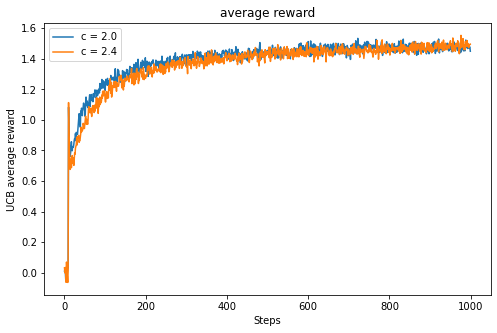

In [8]:
arm_num = 10
time_step_num = 1000
game_num = 2000
c = 2.0

# Run UCB with c = 2.2
ave_reward_c2, _ = multi_armed_UCB(arm_num, time_step_num, game_num, c)

# Run UCB with c = 1.2 * c
c1_2 = 1.2 * c
ave_reward_c1_2, _ = multi_armed_UCB(arm_num, time_step_num, game_num, c1_2)

# Create a time step array for x-axis
time_steps = np.arange(time_step_num)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(time_steps, ave_reward_c2, label='c = 2.0')
plt.plot(time_steps, ave_reward_c1_2, label='c = 2.4')

plt.xlabel("Steps")
plt.ylabel("UCB average reward")
plt.legend()

plt.title("average reward")
plt.show()

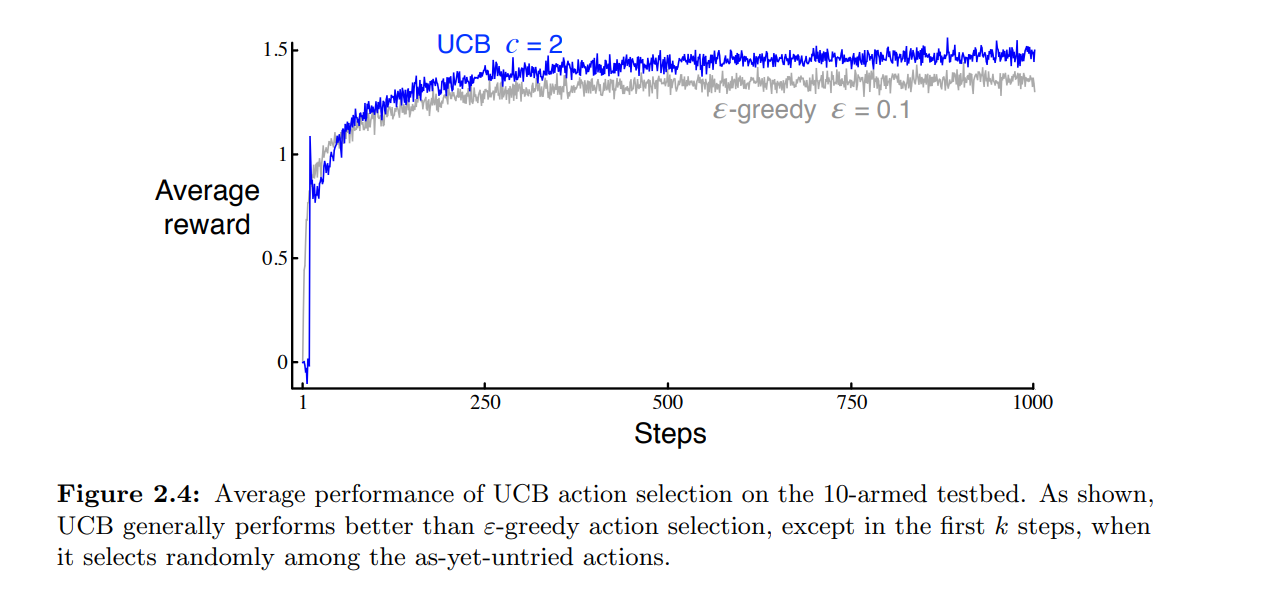

Figure2.4 look pretty close to c=2 UCB/e-greedy  espilon=0.1 close to c=2.4=2.2*1.2